In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
import re

In [2]:
df = pd.read_csv("/home/22058122/mimic-iii/NOTEEVENTS.csv.gz", low_memory=False)
df = df.drop_duplicates(subset="TEXT", keep="first") # Drop duplicate rows based on the TEXT column

In [4]:
df = df[["ROW_ID","TEXT"]].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2023185 entries, 0 to 2083179
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   ROW_ID  int64 
 1   TEXT    object
dtypes: int64(1), object(1)
memory usage: 46.3+ MB


   ROW_ID                                               TEXT
0     174  Admission Date:  [**2151-7-16**]       Dischar...
1     175  Admission Date:  [**2118-6-2**]       Discharg...
2     176  Admission Date:  [**2119-5-4**]              D...
3     177  Admission Date:  [**2124-7-21**]              ...
4     178  Admission Date:  [**2162-3-3**]              D... 
 

<class 'pandas.core.frame.DataFrame'>
Index: 2023185 entries, 0 to 2083179
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   ROW_ID  int64 
 1   TEXT    object
dtypes: int64(1), object(1)
memory usage: 46.3+ MB
None
Maximum number of words: 7980
Minimum number of words: 0
Average number of words: 248.73


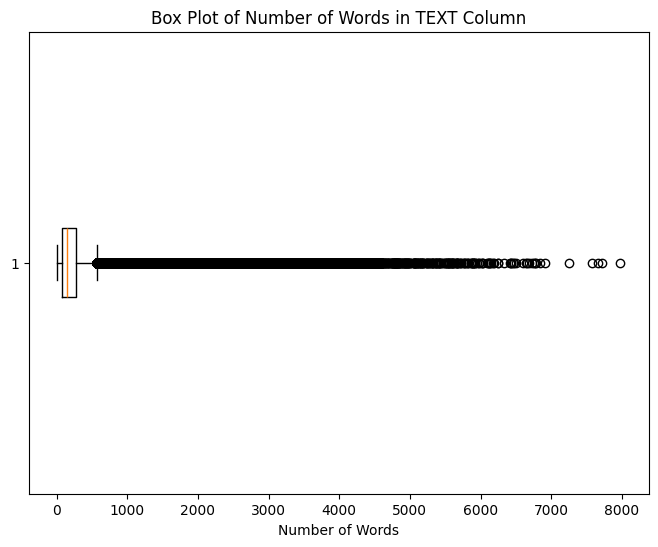

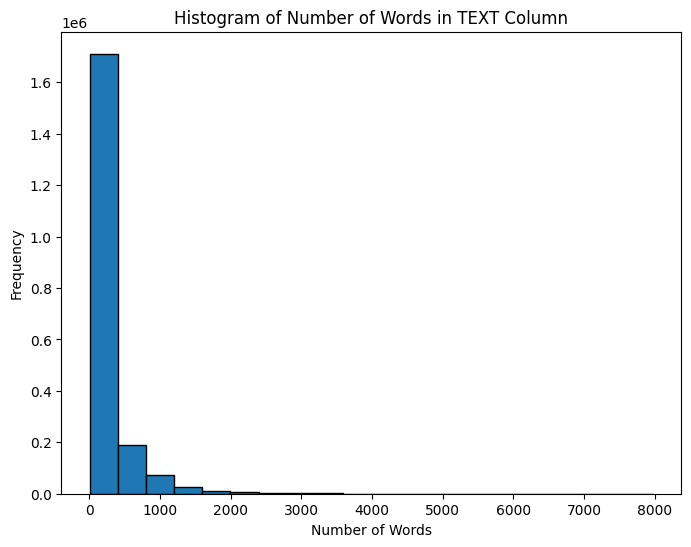

In [3]:
text = df[["ROW_ID","TEXT"]].copy()
print(text.head(2),"\n","\n")
print(text.info(), "\n")


# Calculate the number of words in the TEXT column
text['W_COUNT'] = text["TEXT"].apply(lambda x: len(str(x).split()))

# Calculate statistics
max_words = text['W_COUNT'].max()
min_words = text['W_COUNT'].min()
avg_words = text['W_COUNT'].mean()

# Print statistics
print(f"Maximum number of words: {max_words}")
print(f"Minimum number of words: {min_words}")
print(f"Average number of words: {avg_words:.2f}")

text = text[text["W_COUNT"] > 1]

# Create a box plot of word counts
plt.figure(figsize=(8, 6))
plt.boxplot(text['W_COUNT'], vert=False)
plt.title('Box Plot of Number of Words in TEXT Column')
plt.xlabel('Number of Words')
plt.show()


# Plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(text['W_COUNT'], bins=20, edgecolor='black')  # You can adjust the number of bins
plt.title('Histogram of Number of Words in TEXT Column')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

In [16]:
d1 = text[text["W_COUNT"] <= 512]
print("Shape of d1:",d1.shape, "\n")
d2 = text[text["W_COUNT"] > 512]
print("Shape of d2:",d2.shape)

Shape of d1: (1794767, 3) 

Shape of d2: (228312, 3)


In [21]:
d1.to_csv("d1.csv", index = False)
d2.to_csv("d2.csv", index = False)

In [11]:
def count_headings(dataframe, column_name='TEXT'):
    heading_counter = Counter()

    # Regular expression pattern to identify headings that end with a colon
    pattern = re.compile(r'\b[A-Za-z ]+?:')

    # Iterate through each row in the dataframe
    for text in dataframe[column_name].dropna():  # Dropping NaN values to ensure all entries are strings
        if isinstance(text, str):  # Ensure that the text is a string
            # Extract all headings using the regex pattern
            found_headings = pattern.findall(text)
            # Normalize and count each heading
            for heading in found_headings:
                normalized_heading = heading.strip()
                heading_counter[normalized_heading] += 1

    return heading_counter

In [17]:
headings_count_d1 = count_headings(d1)

In [18]:
# Print the sorted results
sorted_headings_count_d1 = sorted(headings_count_d1.items(), key=lambda item: item[1], reverse=True)
for heading, count in sorted_headings_count_d1:
    print(f"{heading} {count}")

Reason: 556540
MEDICAL CONDITION: 466548
Plan: 466326
REASON FOR THIS EXAMINATION: 466270
Assessment: 397709
Response: 393425
Action: 392512
IMPRESSION: 365859
Admitting Diagnosis: 347752
P: 277085
INDICATION: 225675
FINDINGS: 215604
A: 212489
COMPARISON: 167705
O: 149053
HISTORY: 142720
CV: 137994
GU: 128779
GI: 126732
Comments: 111655
TECHNIQUE: 103562
Contrast: 101629
RESP: 90403
Neuro: 87732
Resp: 84787
ID: 71085
NEURO: 62383
FEN: 54866
INTERPRETATION: 49688
WET READ: 48204
Height: 47904
D: 47204
Indication: 46856
Skin: 46679
Findings: 45372
Status: 44511
Time: 44310
Test: 44075
Conclusions: 44071
TEST INFORMATION: 44069
Technical Quality: 44068
Doppler: 44058
PLAN: 43554
LEFT VENTRICLE: 41292
Social: 40625
MITRAL VALVE: 40028
RIGHT VENTRICLE: 39545
AORTIC VALVE: 39517
PERICARDIUM: 39087
TRICUSPID VALVE: 37564
OPTIRAY Amt: 37233
Type: 36833
Size: 36803
LEFT ATRIUM: 35445
AORTA: 34607
INTERATRIAL SEPTUM: 34431
SKIN: 33594
SOCIAL: 32209
LUL Lung Sounds: 29933
RUL Lung Sounds: 29930
R

In [19]:
headings_count_d2 = count_headings(d2)

In [20]:
headings_count_d2 = count_headings(d2)

# Print the sorted results
sorted_headings_count_d2 = sorted(headings_count_d2.items(), key=lambda item: item[1], reverse=True)
for heading, count in sorted_headings_count_d2:
    print(f"{heading} {count}")

Comments: 195711
mg Tablet Sig: 180484
Allergies: 158061
Drains: 141751
Nutrition: 137490
Communication: 130131
BP: 128159
Prophylaxis: 127713
Chief Complaint: 127423
HR: 123880
RR: 122373
Heart rhythm: 120911
Other labs: 120572
Balance: 119839
Urine: 118686
Stool: 118116
Total out: 118067
PO: 118065
Total In: 118060
NG: 117901
Blood products: 117839
Code status: 117802
Other ICU medications: 117077
Last dose of Antibiotics: 117011
Infusions: 116551
Tmax: 115571
DVT: 114576
Other medications: 114417
Stress ulcer: 113437
ABG: 112424
Glycemic Control: 112230
Neurologic: 111756
Lines: 110927
Delivery Device: 110496
Disposition: 106495
Refills: 105605
Disp: 102852
INR: 102800
Hour Events: 102052
Cardiovascular: 101741
IVF: 92971
TF: 90397
Review of systems: 89547
Tcurrent: 89169
HEENT: 85200
VAP: 83894
Height: 83307
T: 82920
IMPRESSION: 77542
Skin: 76890
Reason: 73412
Chest: 72863
Changes to medical and family history: 72305
AST: 71179
Lymph: 70317
HPI: 66176
Neuts: 65194
Lactic Acid: 6502